# Derivative of $P(G_n)$ with respect to $r$:

The derivative of the integrand of P(G_n) with respect to r
compared with the analytic formula for the derivative:

In [43]:
import numpy as np
import matplotlib.pyplot as pl
%matplotlib inline
from scipy.integrate import quad
import warnings
warnings.filterwarnings("ignore")

Let's define the numerical versions of the $P$ and $M$ integrals:

In [2]:
def P(n, r, b):
    ksq = (1 - r ** 2 - b ** 2 + 2 * b * r) / (4 * b * r)
    if ksq <= 1:
        kappa = 2 * np.arcsin(np.sqrt(ksq))
    else:
        kappa = np.pi
    def integrand(xi):
        return (ksq - np.sin(xi) ** 2) ** (n / 2.0) * (r - b + 2 * b * np.sin(xi) ** 2)
    res, err = quad(integrand, -kappa / 2, kappa / 2)
    return res * 2 * r * (4 * b * r) ** (n / 2.0)

In [4]:
def M(n, r, b):
    ksq = (1 - r ** 2 - b ** 2 + 2 * b * r) / (4 * b * r)
    if ksq <= 1:
        kappa = 2 * np.arcsin(np.sqrt(ksq))
    else:
        kappa = np.pi
    def integrand(xi):
        return (ksq - np.sin(xi) ** 2) ** (n / 2.0)
    res, err = quad(integrand, -kappa / 2, kappa / 2)
    return res * (4 * b * r) ** (n / 2.0)

Define the numerical derivatives:

In [6]:
def dPdr(n, r, b, eps=1.e-8):
    return (P(n, r + eps, b) - P(n, r - eps, b)) / (2 * eps)

In [7]:
def dPdb(n, r, b, eps=1.e-8):
    return (P(n, r, b + eps) - P(n, r, b - eps)) / (2 * eps)

Define the equations in the paper:

In [8]:
def dPdr_paper(n, r, b):
    return 2 * r * ((n + 2) * M(n, r, b) - n * M(n - 2, r, b))

In [19]:
def dPdb_paper(n, r, b):
    return (n / b) * ((r ** 2 + b ** 2) * (M(n, r, b) - M(n - 2, r, b)) + (r ** 2 - b ** 2) ** 2 * M(n - 2, r, b))

Let's plot the difference on a grid:

In [52]:
def plot(n):
    barr = np.linspace(1e-4, 2, 30)
    rarr = np.linspace(1e-4, 2, 30)
    diff_b = np.zeros((30, 30))
    diff_r = np.zeros((30, 30))
    for i, b in enumerate(barr):
        for j, r in enumerate(rarr):
            diff_r[j, i] = abs(dPdr(n, r, b) - dPdr_paper(n, r, b))
            diff_b[j, i] = abs(dPdb(n, r, b) - dPdb_paper(n, r, b)) 
    fig, ax = pl.subplots(1, 2, figsize=(14, 5))
    ax[0].imshow(np.log10(diff_r), origin="lower", extent=(0, 2, 0, 2), vmin=-15, vmax=0)
    ax[0].set_xlabel("Impact parameter", fontsize=16)
    ax[0].set_ylabel("Radius ratio", fontsize=16)    
    ax[0].set_title("Radius derivative")
    im = ax[1].imshow(np.log10(diff_b), origin="lower", extent=(0, 2, 0, 2), vmin=-15, vmax=0)
    ax[1].set_xlabel("Impact parameter", fontsize=16)
    ax[1].set_ylabel("Radius ratio", fontsize=16)
    ax[1].set_title("Impact parameter derivative")
    cb = pl.colorbar(im)
    cb.ax.set_ylabel("Log difference", fontsize=16);

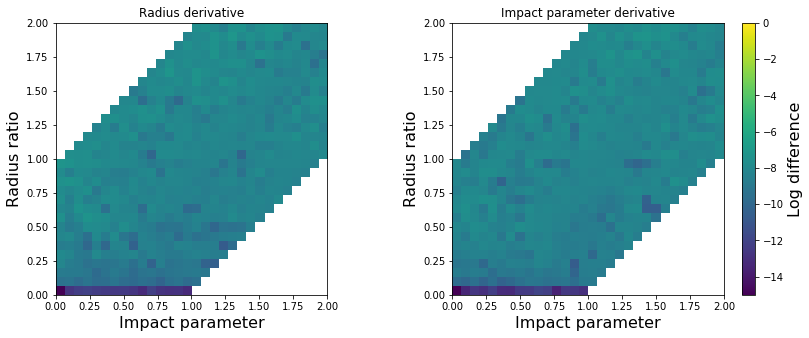

In [53]:
plot(2)

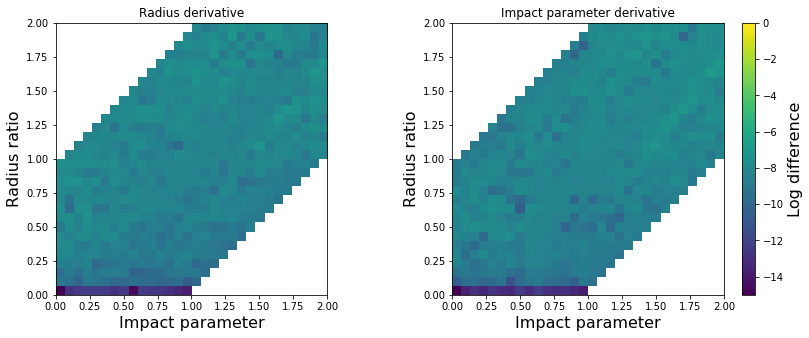

In [54]:
plot(3)

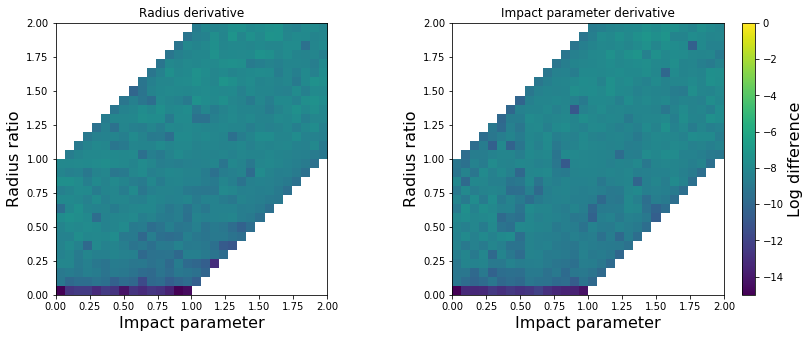

In [55]:
plot(4)

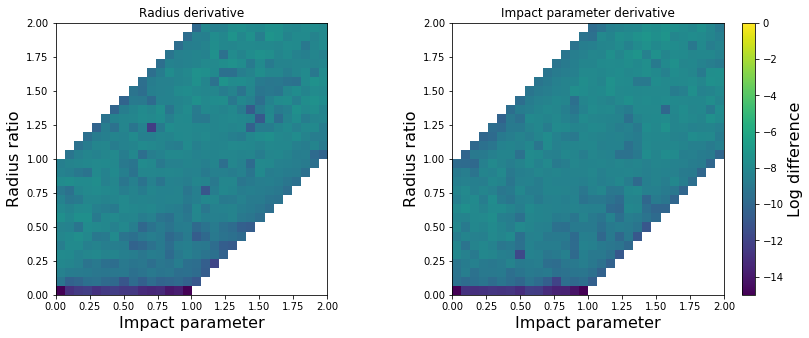

In [56]:
plot(5)

In all cases, the difference is less than about 1e-7, which is close to the accuracy of the numerical derivatives we are computing.